In [1]:
library(tidyverse)
library(phytools)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Loading required package: ape

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




### reading in the data

In [2]:
d <- read_csv("../data/data_cues.txt")

Rows: 30 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Glottocode, Language, Genus
dbl (4): Case_Marking, Tight_Semantics, Rigid_Order, Verb_Middle

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(d)

Glottocode,Language,Genus,Case_Marking,Tight_Semantics,Rigid_Order,Verb_Middle
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
stan1318,Arabic,Semitic,0.036,0.218,0.655,0.391
bulg1262,Bulgarian,Slavic,0.028,0.144,0.782,0.966
croa1245,Croatian,Slavic,0.415,0.147,0.414,0.900
czec1258,Czech,Slavic,0.525,0.172,0.240,0.818
dani1285,Danish,Germanic,0.000,0.208,0.926,0.912
dutc1256,Dutch,Germanic,0.000,0.214,0.817,0.462


### preprocessing

I scaled the four variables to mean 0 and standard deviation 1.

The coding is:

- `x1`: Case_Marking
- `x2`: Tight_Semantics
- `x3`: Rigid_Order
- `x4`: Verb_middle



In [4]:

rescale <- function(x, e = 0.0001) {
    y = ifelse(x == 1, x - e, x)
    ifelse(y == 0, y + e, y)
}


In [5]:
logit <- function(x) {
    log(x / (1-x))
}

In [6]:
d %>%
    mutate(
        x1 = logit(rescale(Case_Marking)), 
        x2 = logit(rescale(Tight_Semantics)),
        x3 = logit(rescale(Rigid_Order)),
        x4 = logit(rescale(Verb_Middle))
    ) -> d
head(d)

Glottocode,Language,Genus,Case_Marking,Tight_Semantics,Rigid_Order,Verb_Middle,x1,x2,x3,x4
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stan1318,Arabic,Semitic,0.036,0.218,0.655,0.391,-3.2875724,-1.277360,0.6410908,-0.4431107
bulg1262,Bulgarian,Slavic,0.028,0.144,0.782,0.966,-3.5471513,-1.782457,1.2773597,3.3468033
croa1245,Croatian,Slavic,0.415,0.147,0.414,0.900,-0.3433333,-1.758327,-0.3474538,2.1972246
czec1258,Czech,Slavic,0.525,0.172,0.240,0.818,0.1000835,-1.571519,-1.1526795,1.5028556
dani1285,Danish,Germanic,0.000,0.208,0.926,0.912,-9.2102404,-1.337023,2.5268091,2.3383032
dutc1256,Dutch,Germanic,0.000,0.214,0.817,0.462,-9.2102404,-1.300981,1.4961529,-0.1522937


In [7]:
d %>%
    select(x1, x2, x3, x4) %>%
    cor

,x1,x2,x3,x4
x1,1.0000000,0.2921834,-0.7871244,-0.4455840
x2,0.2921834,1.0000000,-0.2301989,-0.3685708
x3,-0.7871244,-0.2301989,1.0000000,0.3038085
x4,-0.4455840,-0.3685708,0.3038085,1.0000000


### reading in the phylogenetic tree

In [8]:
trees <- ape::read.tree("../data/posterior.tree")
tree <- phangorn::maxCladeCred(trees)

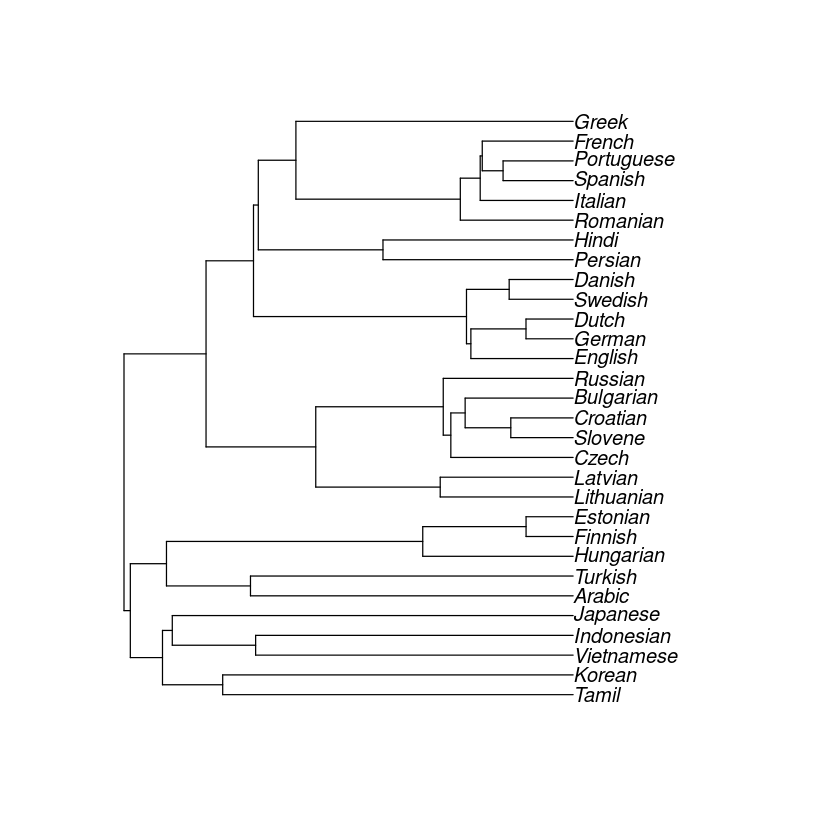

In [9]:
plot(tree)

In [22]:
x = d$x1
names(x) = d$Language
phylosig(tree, x, test=T)


Phylogenetic signal K : 0.665434 
P-value (based on 1000 randomizations) : 0.012 


In [23]:
x = d$x2
names(x) = d$Language
phylosig(tree, x, test=T)


Phylogenetic signal K : 0.608402 
P-value (based on 1000 randomizations) : 0.022 


In [24]:
x = d$x3
names(x) = d$Language
phylosig(tree, x, test=T)


Phylogenetic signal K : 0.880907 
P-value (based on 1000 randomizations) : 0.001 


In [25]:
x = d$x4
names(x) = d$Language
phylosig(tree, x, test=T)


Phylogenetic signal K : 1.31878 
P-value (based on 1000 randomizations) : 0.001 


In [26]:
x = d$x1
names(x) = d$Language
phylosig(tree, x, method="lambda", test=T)


Phylogenetic signal lambda : 0.733388 
logL(lambda) : -75.619 
LR(lambda=0) : 10.0395 
P-value (based on LR test) : 0.00153215 


In [28]:
x = d$x2
names(x) = d$Language
phylosig(tree, x, method="lambda", test=T)


Phylogenetic signal lambda : 0.999934 
logL(lambda) : -15.0547 
LR(lambda=0) : 1.22793 
P-value (based on LR test) : 0.267811 


In [29]:
x = d$x3
names(x) = d$Language
phylosig(tree, x, method="lambda", test=T)


Phylogenetic signal lambda : 0.999934 
logL(lambda) : -51.289 
LR(lambda=0) : 12.3029 
P-value (based on LR test) : 0.000452256 


In [30]:
x = d$x4
names(x) = d$Language
phylosig(tree, x, method="lambda", test=T)


Phylogenetic signal lambda : 0.999934 
logL(lambda) : -74.2433 
LR(lambda=0) : 18.9767 
P-value (based on LR test) : 1.32322e-05 
